# Linearization of Differential Equations

Linearization is the process of taking the gradient of a nonlinear function with respect to all variables and creating a linear representation at that point. It is required for certain types of analysis such as stability analysis, solution with a Laplace transform, and to put the model into linear state-space form. Consider a nonlinear differential equation model that is derived from balance equations with input $u$ and output $y$.

$$\frac{dy}{dt}=f(y,u)$$

The right hand side of the equation is linearized by a Taylor series expansion, using only the first two terms.

$$\frac{dy}{dt}=f(y,u)≈f(\overline{y},\overline{u}) + \frac{\partial f}{\partial y} \Bigr|_{ \overline{y},\overline{u}}(y−\overline{y})+\frac{\partial f}{\partial u} \Bigr|_{ \overline{y},\overline{u}}(u−\overline{u})$$

If the values of $\overline{u}$ and $\overline{y}$ are chosen at steady state conditions then $f(\overline{y},\overline{u})=0$ because the derivative term $\frac{dy}{du}=0$ at steady state. To simplify the final linearized expression, deviation variables are defined as $y'=y−\overline{y}$ and $u'=u−\overline{u}$. A deviation variable is a change from the nominal steady state conditions. The derivatives of the deviation variable is defined as $\frac{dy'}{dt}=\frac{d(y−\overline{y})}{dt}$ because $\frac{d\overline{y}}{dt}=0$. If there are additional variables such as a disturbance variable $d$ then it is added as another term in deviation variable form $d'=d−\overline{d}$.

$$\frac{dy'}{dt}=\alpha y' + \beta u'  + \gamma d'$$

The values of the constants $\alpha$, $\beta$, and $\gamma$ are the partial derivatives of $f(y,u,d)$ evaluated at steady state conditions.

$$\alpha = \frac{\partial f}{\partial y} \Bigr|_{ \overline{y},\overline{u},\overline{d}} \quad \beta = \frac{\partial f}{\partial u} \Bigr|_{ \overline{y},\overline{u},\overline{d}} \quad \gamma = \frac{\partial f}{\partial d} \Bigr|_{ \overline{y},\overline{u},\overline{d}}$$


### Example

**Part A:** Linearize the following differential equation with an input value of $u=16$.

$$\frac{dx}{dt}=−x^{2}+\sqrt{u}$$

**Part B:** Determine the steady state value of $x$ from the input value and simplify the linearized differential equation.

**Part C:** Simulate a doublet test with the nonlinear and linear models and comment on the suitability of the linear model to represent the original nonlinear equation solution.

### Solution

**Part A:** The equation is linearized by taking the partial derivative of the right hand side of the equation for both $x$ and $u$.

$$\frac{\partial \left(-x^2 + \sqrt{u}\right)}{\partial x} = \alpha = -2 \, x$$
$$\frac{\partial \left(-x^2 + \sqrt{u}\right)}{\partial u} = \beta = \frac{1}{2} \frac{1}{\sqrt{u}}$$

The linearized differential equation that approximates $\frac{dx}{dt}=f(x,u)$ is the following:

$$\frac{dx}{dt} = f \left(x_{ss}, u_{ss}\right) + \frac{\partial f}{\partial x}\bigg|_{x_{ss},u_{ss}} \left(x-x_{ss}\right) + \frac{\partial f}{\partial u}\bigg|_{x_{ss},u_{ss}} \left(u-u_{ss}\right)$$ 

Substituting in the partial derivatives results in the following differential equation:

$$\frac{dx}{dt} = 0 + \left(-2 x_{ss}\right) \left(x-x_{ss}\right) + \left(\frac{1}{2} \frac{1}{\sqrt{u_{ss}}}\right) \left(u-u_{ss}\right)$$

This is further simplified by defining new deviation variables as $x' = x - x_{ss}
$ and $u' = u - u_{ss}$.

$$\frac{dx'}{dt} = \alpha x' + \beta u'$$

**Part B:** The steady state values are determined by setting $\frac{dx}{dt}=0$ and solving for $x$.

$$0 = -x_{ss}^2 + \sqrt{u_{ss}}$$
$$x_{ss}^2 = \sqrt{16}$$
$$x_{ss} = 2$$

At steady state conditions, $frac{dx}{dt}=0$ so $f (x_{ss}, u_{ss})=0$ as well. Plugging in numeric values gives the simplified linear differential equation:

$$\frac{dx}{dt} = -4 \left(x-2\right) + \frac{1}{8} \left(u-16\right)$$

The partial derivatives can also be obtained from Python, either symbolically with SymPy or else numerically with SciPy.

In [2]:
# Analytic solution with Python
import sympy as sp
sp.init_printing()
# define symbols
x,u = sp.symbols(['x','u'])
# define equation
dxdt = -x**2 + sp.sqrt(u)

print(sp.diff(dxdt,x))
print(sp.diff(dxdt,u))

# Numeric solution with Python
import numpy as np
from scipy.misc import derivative
u = 16.0
x = 2.0
def pd_x(x):
    dxdt = -x**2 + np.sqrt(u)
    return dxdt
def pd_u(u):
    dxdt = -x**2 + np.sqrt(u)
    return dxdt

print('Approximate Partial Derivatives')
print(derivative(pd_x,x,dx=1e-4))
print(derivative(pd_u,u,dx=1e-4))

print('Exact Partial Derivatives')
print(-2.0*x) # exact d(f(x,u))/dx
print(0.5 / np.sqrt(u)) # exact d(f(x,u))/du

-2*x
1/(2*sqrt(u))
Approximate Partial Derivatives
-4.000000000004
0.12499999999970868
Exact Partial Derivatives
-4.0
0.125


The nonlinear function for $\frac{dx}{dt}$ can also be visualized with a 3D contour map. The choice of steady state conditions $x_{ss}$ and $u_{ss}$ produces a planar linear model that represents the nonlinear model only at a certain point. The linear model can deviate from the nonlinear model if used further away from the conditions at which the linear model is derived.

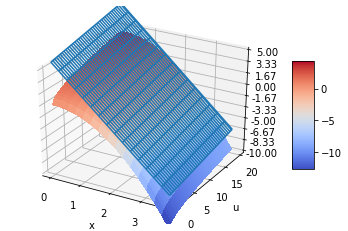

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 4, 0.25)
U = np.arange(0, 20, 0.25)
X, U = np.meshgrid(X, U)
DXDT = -X**2 + np.sqrt(U)
LIN = -4.0 * (X-2.0) + 1.0/8.0 * (U-16.0)

# Plot the surface.
surf = ax.plot_wireframe(X, U, LIN)
surf = ax.plot_surface(X, U, DXDT, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-10.0, 5.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add labels
plt.xlabel('x')
plt.ylabel('u')

plt.show()

**Part C:** The final step is to simulate a doublet test with the nonlinear and linear models.

* Small step changes (+/-1): Small step changes in u lead to nearly identical responses for the linear and nonlinear solutions. The linearized model is locally accurate.

* Large step changes (+/-8): As the magnitude of the doublet steps increase, the linear model deviates further from the original nonlinear equation solution.

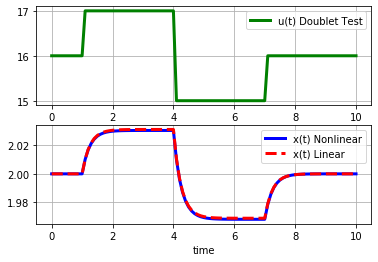

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,u):
    x1 = z[0]
    x2 = z[1]
    dx1dt = -x1**2 + np.sqrt(u)
    dx2dt = -4.0*(x2-2.0) + (1.0/8.0)*(u-16.0)
    dzdt = [dx1dt,dx2dt]
    return dzdt

# steady state conditions
x_ss = 2.0
u_ss = 16.0

# initial condition
z0 = [x_ss,x_ss]

# final time
tf = 10

# number of time points
n = tf * 10 + 1

# time points
t = np.linspace(0,tf,n)

# step input
u = np.ones(n) * u_ss
# magnitude of step
m = 1.0
# change up m at time = 1.0
u[11:] = u[11:] + m
# change down 2*m at time = 4.0
u[41:] = u[41:] - 2.0 * m
# change up m at time = 7.0
u[71:] = u[71:] + m

# store solution
x1 = np.empty_like(t)
x2 = np.empty_like(t)
# record initial conditions
x1[0] = z0[0]
x2[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x1[i] = z[1][0]
    x2[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(t,u,'g-',linewidth=3,label='u(t) Doublet Test')
plt.grid()
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(t,x1,'b-',linewidth=3,label='x(t) Nonlinear')
plt.plot(t,x2,'r--',linewidth=3,label='x(t) Linear')
plt.xlabel('time')
plt.grid()
plt.legend(loc='best')
plt.show()
